In [1]:
import pandas as pd
df = pd.read_csv('weekly pre-dispatch forecast.csv')
df.iloc[20:30]

,datetime,load_forecast
20,1/2/2016 20:00,1238.3
21,1/2/2016 21:00,1216.6
22,1/2/2016 22:00,1120.6
23,1/2/2016 23:00,1113.2
24,1/3/2016 0:00,1005.3
25,1/3/2016 1:00,1005.8
26,1/3/2016 2:00,956.4
27,1/3/2016 3:00,950.9
28,1/3/2016 4:00,942.8
29,1/3/2016 5:00,914.3


In [2]:
df2 = pd.read_csv('demand_tprom.csv')
df2

,datetime,nat_demand,T2M_toc,T2M_san,T2M_dav,T2M_prom
0,2015-01-03 01:00:00,970.3450,25.9,23.5,22.7,24.0
1,2015-01-03 02:00:00,912.1755,25.9,23.4,22.6,24.0
2,2015-01-03 03:00:00,900.2688,25.9,23.3,22.5,23.9
3,2015-01-03 04:00:00,889.9538,26.0,23.2,22.5,23.9
4,2015-01-03 05:00:00,893.6865,26.0,23.1,22.5,23.9
...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.2,25.7,23.7,25.5
48044,2020-06-26 21:00:00,1112.7488,27.1,25.6,23.7,25.5
48045,2020-06-26 22:00:00,1081.5680,27.0,25.4,23.7,25.4
48046,2020-06-26 23:00:00,1041.6240,26.9,25.3,23.6,25.3


In [3]:
df_temp = df['load_forecast'].iloc[25:]
df_temp.reset_index(drop=True, inplace=True)
mixdf = pd.concat([df2, df_temp], axis = 1)
mixdf.to_csv('mixdf.csv', index = False)
mixdf

,datetime,nat_demand,T2M_toc,T2M_san,T2M_dav,T2M_prom,load_forecast
0,2015-01-03 01:00:00,970.3450,25.9,23.5,22.7,24.0,1005.8
1,2015-01-03 02:00:00,912.1755,25.9,23.4,22.6,24.0,956.4
2,2015-01-03 03:00:00,900.2688,25.9,23.3,22.5,23.9,950.9
3,2015-01-03 04:00:00,889.9538,26.0,23.2,22.5,23.9,942.8
4,2015-01-03 05:00:00,893.6865,26.0,23.1,22.5,23.9,914.3
...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.2,25.7,23.7,25.5,NaN
48044,2020-06-26 21:00:00,1112.7488,27.1,25.6,23.7,25.5,NaN
48045,2020-06-26 22:00:00,1081.5680,27.0,25.4,23.7,25.4,NaN
48046,2020-06-26 23:00:00,1041.6240,26.9,25.3,23.6,25.3,NaN


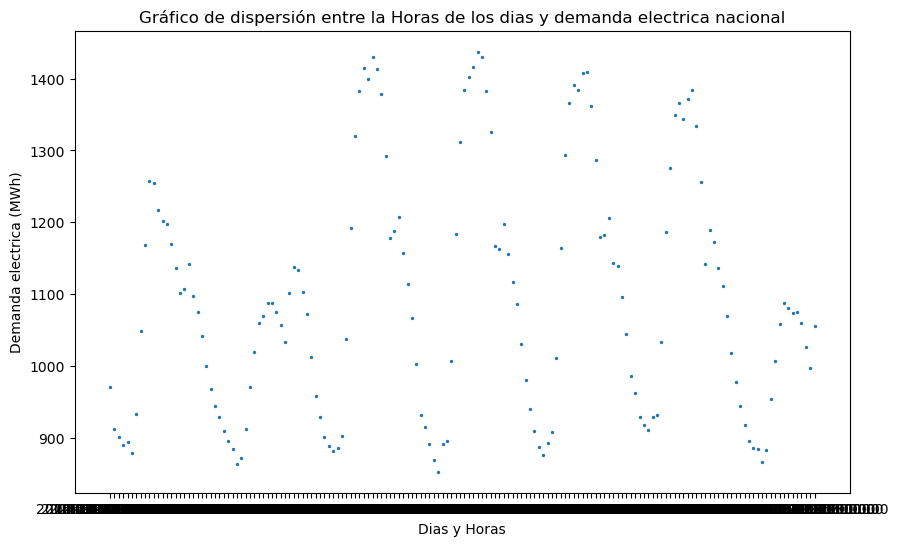

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(mixdf['datetime'].loc[0:161], mixdf['nat_demand'].loc[0:161], alpha=1, s =2)  # alpha controla la opacidad de los puntos
plt.title('Gráfico de dispersión entre la {} y {}'.format('Horas de los dias','demanda electrica nacional'))
plt.xlabel('Dias y Horas')
plt.ylabel('Demanda electrica (MWh)')
plt.grid(False)
plt.show()